In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns
from sklearn.metrics.pairwise import euclidean_distances, cosine_distances

In [14]:
scenario = 10
dsn = pd.read_csv(f'C:\\Users\\popul\\Documents\\Homework\\cs_6490\\project\\CS6490_NetworkSecurity_FinalProject\\botembed\\data\\scenario_{scenario}.csv')

# make the graph
E = [(u,v) for u, v in dsn[['SrcAddr', 'DstAddr']].drop_duplicates().values]
G = nx.Graph()
G.add_edges_from(E)
G_ip_list = G.nodes()
G = nx.convert_node_labels_to_integers(G)

unique_labels = dsn['Label'].unique()

botnet_labels = [x for x in unique_labels if 'botnet' in x.lower()]
bad_ips = list(dsn[dsn['Label'].isin(botnet_labels)]['SrcAddr'].unique())
bad_ips_indx = [list(G_ip_list).index(i) for i in bad_ips]

from_normal_labels = [x for x in unique_labels if 'From-Normal' in x]
from_normal_ips = dsn[dsn['Label'].isin(from_normal_labels)]['SrcAddr'].unique()
to_normal_labels = [x for x in unique_labels if 'To-Normal' in x]
to_normal_ips = dsn[dsn['Label'].isin(to_normal_labels)]['DstAddr'].unique()
normal_ips = list(from_normal_ips) + list(to_normal_ips)
normal_ips_indx = [list(G_ip_list).index(i) for i in normal_ips]

background_ips = [x for x in list(G_ip_list) if x not in bad_ips+normal_ips]

# pick 10 random background_ips
random_background_ips = list(np.random.choice(background_ips, 10))
random_background_ips_indx = [list(G_ip_list).index(i) for i in random_background_ips]

In [15]:
deepwalk_output = pd.read_csv(f'scenario_{scenario}_n{10}_l{5}_w{2}_d{16}.output', delimiter=' ',
                             header=None, skiprows=1)
deepwalk_output = deepwalk_output.sort_values(0).reset_index(drop=True)

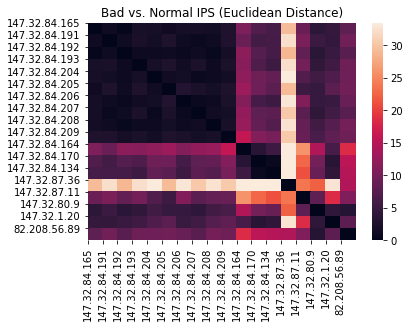

In [16]:
# euclidean distance
dist = euclidean_distances(deepwalk_output.loc[bad_ips_indx + normal_ips_indx, 1:], deepwalk_output.loc[bad_ips_indx + normal_ips_indx, 1:], squared=True)
sns.heatmap(dist, robust=True)
plt.yticks(range(len(bad_ips_indx + normal_ips_indx)), labels=bad_ips + normal_ips, rotation=0)
plt.xticks(range(len(bad_ips_indx + normal_ips_indx)), labels=bad_ips + normal_ips, rotation=90)
plt.title('Bad vs. Normal IPS (Euclidean Distance)')
plt.show()

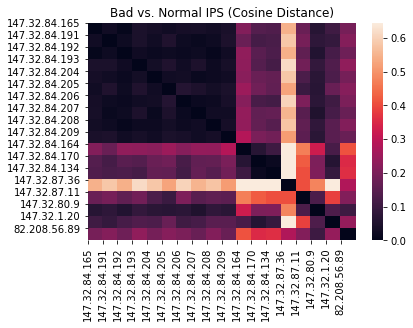

In [17]:
# cosine distance
dist = cosine_distances(deepwalk_output.loc[bad_ips_indx + normal_ips_indx, 1:], deepwalk_output.loc[bad_ips_indx + normal_ips_indx, 1:])
sns.heatmap(dist, robust=True)
plt.yticks(range(len(bad_ips_indx + normal_ips_indx)), labels=bad_ips + normal_ips, rotation=0)
plt.xticks(range(len(bad_ips_indx + normal_ips_indx)), labels=bad_ips + normal_ips, rotation=90)
plt.title('Bad vs. Normal IPS (Cosine Distance)')
plt.show()

It doesn't appear that cosine distance produces any better separation than euclidean distance.